## 14.4 화장품 구매. 표 14-15에서 제시한 데이터와 표 14-16의 출력 결과는 거대 체인 화장품 구매 데이터베이스 Cosmetics.csv의 일부 데이터셋이다. 이 상점에서는 매장 삼품 진열과 교차 판매 판촉 직원의 학습, 교차 판매를 증진시키는 궁극의 구매 시점 전자 추천 시스템을 구축하기 위해 이러한 아이템드르이 구매 간 연관성을 분석하고자 한다. 우선 이진 행렬 형식으로 제시된 표 14-15의 데이터만 고려해보자.

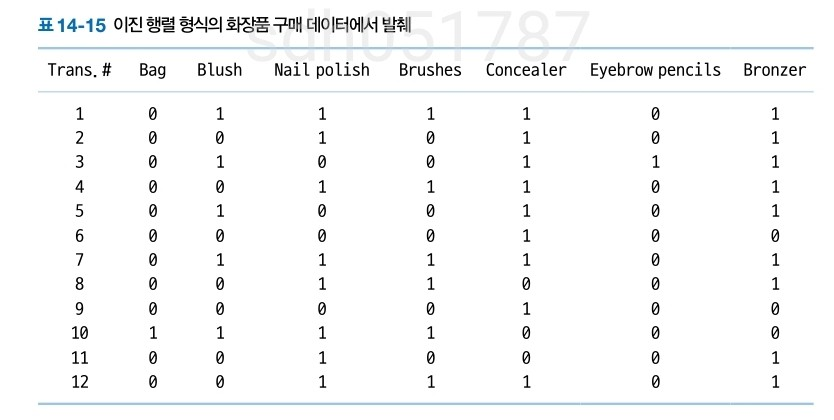

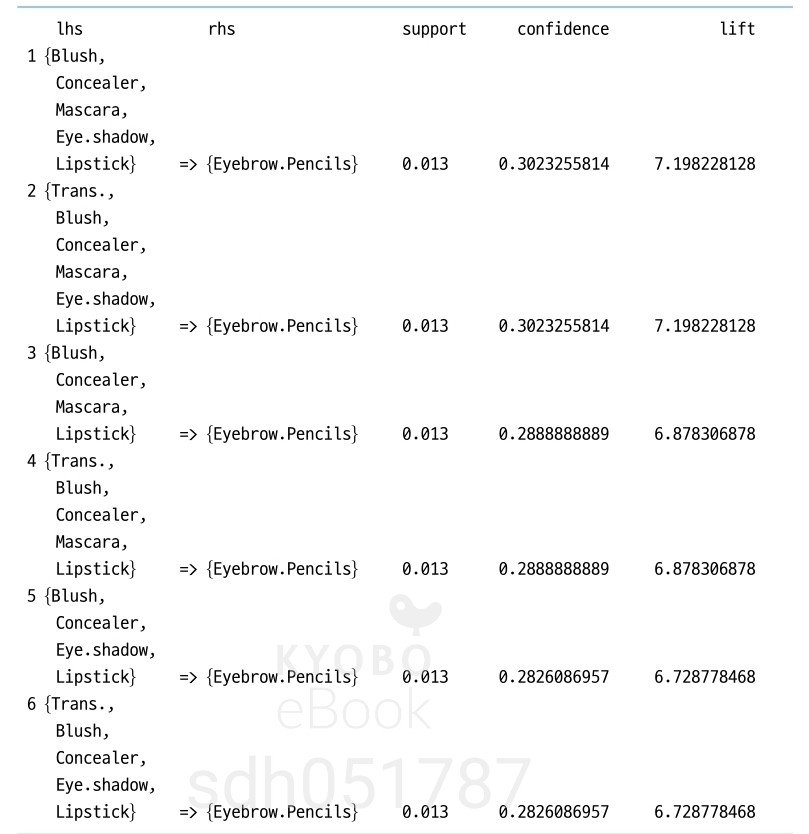

### a. 행렬의 여러 값을 선택하여 그 의미를 설명하시오

각 행은 하나의 거래를 나타내며, Trans.\#은 거래 ID를 나타낸다.

각 열은 특징 제품의 구매 여부를 나타낸다.

셀 값: 
* 값이 1이면 해당 거래에서 해당 제품이 구매되었음을 의미한다.
* 값이 0이면 해당 거래에서 해당 제품이 구매되지 않았음을 나타낸다.


###  b. 표 14-16에 나타난 연관 규칙 분석 결과를 보고, 다음 물음에 답하시오

  #### i. 첫 행의 '신뢰도' 출력 내용과 계산 방법을 설명하시오.

신뢰도 계산 방법: 
$$신뢰도=\frac{P(조건부\cap 결론부)}{P(조건부)}$$

$P(조건부 \cap 결론부)=0.013$

$P(조건부)=0.043$

-> 신뢰도=0.13/0.043=30.23%

#### ii. 첫 행의 '지지도' 출력 내용과 계산 방법을 서술하시오.

지지도:
$$지지도=P(조건부 \cap 결론부)$$

-> 지지도=0.013=1.3%


#### iii. 첫 행의 향상(lift) 출력 내용과 계산 방법을 설명하시오.

$$향상비=\frac{신뢰도}{기준 신뢰도}$$

$$기준 신뢰도=\frac{결론부 아이템셋이 포함된 거래 수}{데이터베이스 내의 거래 수}$$

신뢰도: 30.23%

기준 신뢰도: 3/12=25%

-> 향상비=30.23/25=1.2092

#### iv. 첫 행에서 그 규칙이 표현하는 의미를 설명하시오.

이 연관규칙은 화장품 구매 패턴을 분석하는 데 유용하다. 규칙은 특정 제품 조합(블러셔, 컨실러, 마스카라, 아이섀도우, 립스틱)을 구매한 고객이 눈썹 펜슬을 구매할 가능성이 높다는 점을 나타낸다.

### c. 이제 Cosmetics.csv 파일에 저장된 화장품 구매에 대한 전체 데이터셋을 사용하시오. 파이썬을 사용해 이 데이터에 연관 규칙을 적용하시오(apriori에서는 min_support=0.1과 use_colnames=True를 사용하고, association_rules에서는 기본 파라미터를 사용하라).

In [ ]:
!pip install mlxtend

!pip install surprise

In [4]:
from pathlib import Path

import heapq
from collections import defaultdict

import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

import dmba

%matplotlib inline

In [5]:
# Load the dataset
file_path = "Cosmetics.csv"  # Make sure to adjust the path to the correct location of the dataset
data = dmba.load_data(file_path)

# Apply one-hot encoding if needed, assuming the dataset needs transaction formatting
# (Modify below code based on your dataset format if required)
# Assuming `data` is already in a binary matrix (0s and 1s) like the image you provided

# Run apriori algorithm with min_support=0.1 and use_colnames=True
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)

# Generate association rules with default parameters
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Display the rules
print(rules)


c:\Users\sdh05\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2